# Data Augmentation (Chris Pattison)

This notebook demonstrates loading an image into the notebook and then transforming and augmenting the image using PyTorch.

We will 1:
  * Load an image locally
  * Load an image by mounting a google drive

We will augment our dataset using multiple techniques:
  * Resizing an image
  * Flipping an image vertically and horizontally
  * Changing the brightness, contrast, saturation and hue of an image
  * Cropping
  * Rotating
  * Normalising

We will see how to 'batch' augment our data.

TASK:

Augment your data for the fashionMNIST model and retrain

In [19]:
# Imports
import torchvision.transforms as transforms
from matplotlib import pyplot as plt

import os

We will use our Iris dataset that is in the `Resources` directory in this course's repository.


In [20]:
test_image_path = "Resources/iris-computer-vision/iris-virginica"
print(test_image_path)

Resources/iris-computer-vision/iris-virginica


Load a random iris image to use as an example to show data augmentation

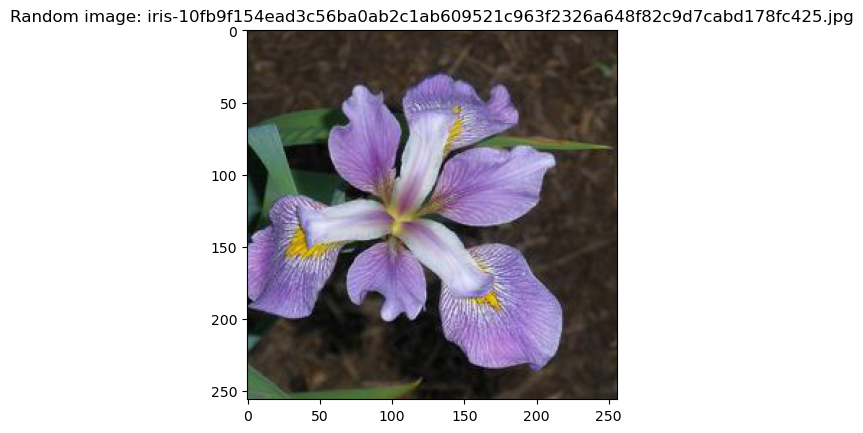

In [21]:
import random
import matplotlib.image as mpimg

def load_and_show_random_image(folder_path):

  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  if not image_files:
    print(f"No image files found in {folder_path}")
    return

  random_image_file = random.choice(image_files)
  image_path = os.path.join(folder_path, random_image_file)

  try:
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f"Random image: {random_image_file}")
    plt.show()
  except Exception as e:
    print(f"Error loading or displaying image: {e}")


load_and_show_random_image(test_image_path)

It can be useful to break up the load and show functions, so we now define the two functions separately

In [22]:
def Show_Image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()

In [23]:
def load_random_image(folder_path):

  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  if not image_files:
    print(f"No image files found in {folder_path}")
    return

  random_image_file = random.choice(image_files)
  image_path = os.path.join(folder_path, random_image_file)

  try:
    img = mpimg.imread(image_path)
  except Exception as e:
    print(f"Error loading or displaying image: {e}")
    return None

  return img


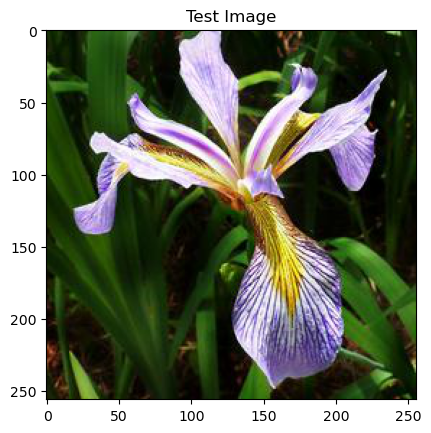

In [24]:
my_image = load_random_image(test_image_path)
Show_Image(my_image, 'Test Image')

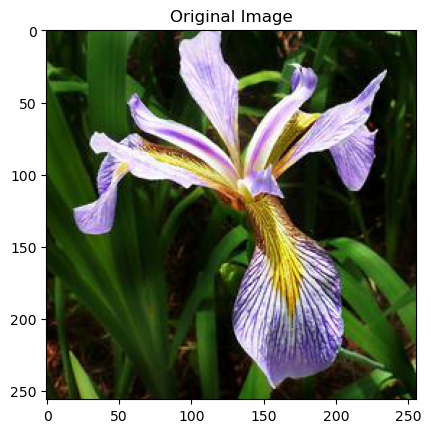

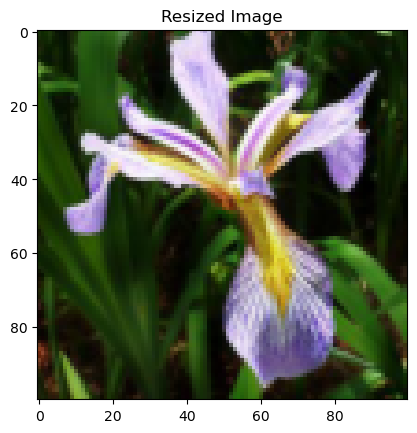

In [25]:
Resize_Transformation = transforms.Compose([
   transforms.ToPILImage(),
   transforms.Resize(size=(100,100)),
])

# Display original image plus the transformed image
Resized_Img = Resize_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Resized_Img, 'Resized Image')

Flip an image horizontally in a random fashion with a given probability p

If p = 1, it returns a horizontally flipped image.

If p = 0, It returns the original image.

If p is in the range (0,1), then the probability to return the horizontally flipped image is p.

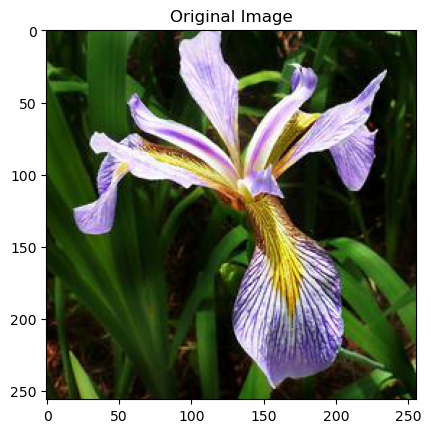

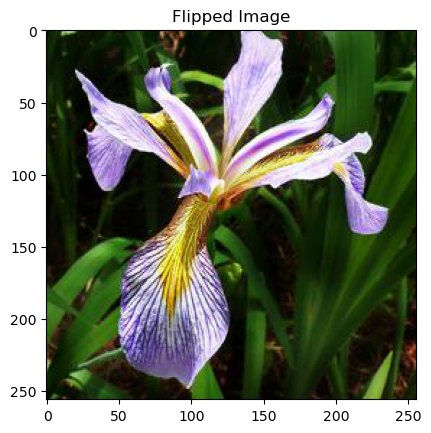

In [26]:
Horizontal_Flipping_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=1)
])

# Display original image plus the transformed image
Flipping_Img = Horizontal_Flipping_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Flipping_Img, 'Flipped Image')

Flip an image Vertically in a random fashion with a given probability p

If p = 1, it returns a Vertically flipped image.

If p = 0, It returns the original image.

If p is in the range (0,1), then the probability to return the Vertically flipped image is p.

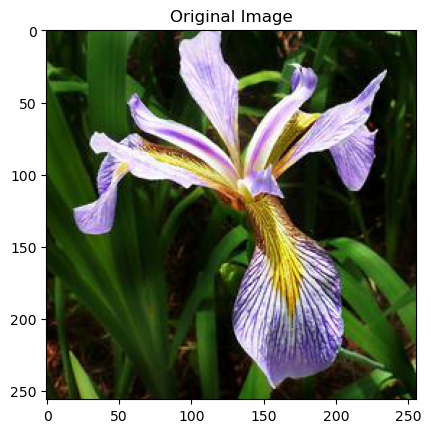

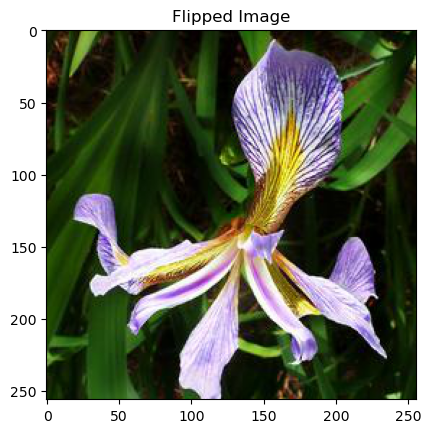

In [27]:
Vertical_Flipping_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(p=1)
])

# Display original image plus the transformed image
Flipping_Img = Vertical_Flipping_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Flipping_Img, 'Flipped Image')

Randomly change the brightness, contrast, saturation and hue of an image

Learn More about brightness, contrast, etc.: [Torchvision Documentation](https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html)

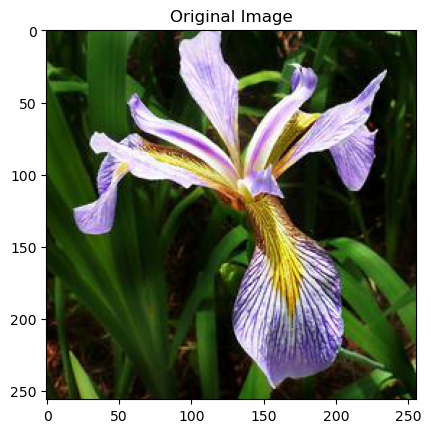

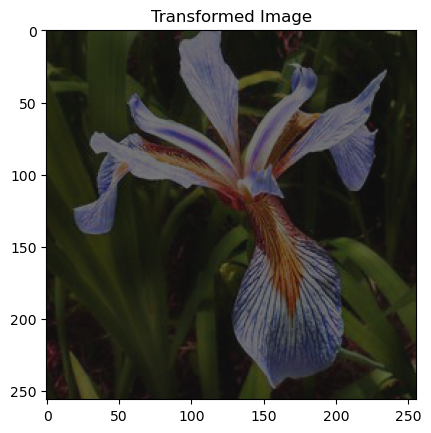

In [28]:
Color_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ColorJitter(brightness=(0.1,0.6), contrast=1,saturation=0, hue=0.4)
])

# Display original image plus the transformed image
Transformed_Img = Color_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Transformed_Img, 'Transformed Image')

Crop an image at a random location with the given size

If the size is one number the result image will be square

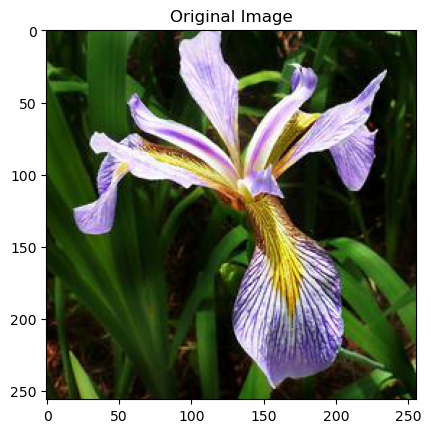

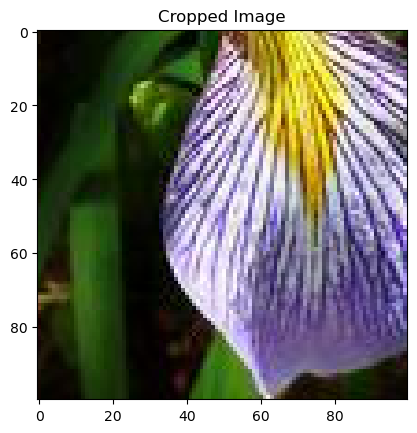

In [29]:
Crop_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomCrop(size=(100,100))
])

# Display original image plus the transformed image
Cropped_Img = Crop_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Cropped_Img, 'Cropped Image')

Rotate the image by angle.

`degrees` parameter is a range of degrees to select from.

If `degrees` is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).

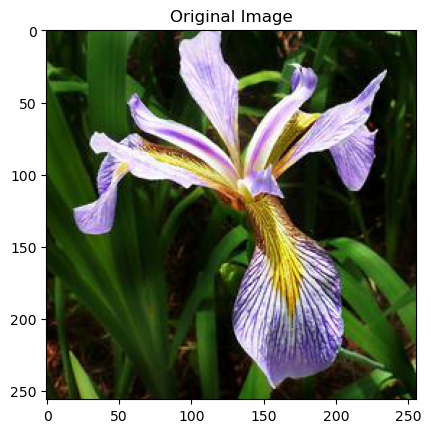

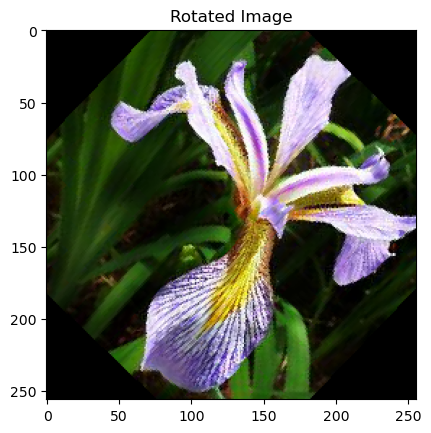

In [30]:
Rotate_Transformation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(degrees=(-66,66))
])

# Display original image plus the transformed image
Rotated_Img = Rotate_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Rotated_Img, 'Rotated Image')

Normalize a tensor image with mean and standard deviation. This transform does not support PIL Image.

Note that we have 3 values to mean and std because our img contains 3 channels so we have mean, std for each channel 

The equation applied is (pixel_value - channel_mean / channel_std)

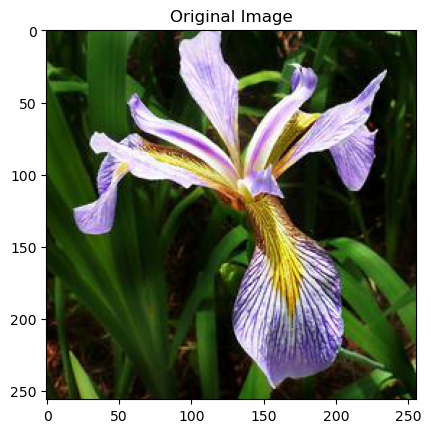

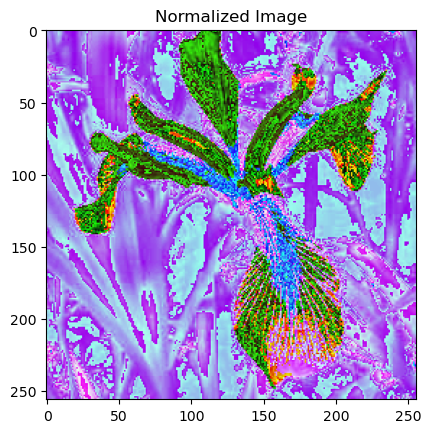

In [31]:
Normalize_Transformation = transforms.Compose([
    transforms.ToPILImage(),# first we need to convert our img to PIL format which can work with transforms
    transforms.ToTensor(),# we need to convert PIL img to tensor because normalize doesn't support PIL imgs
    transforms.Normalize(mean=[5,0.9,0.6], std=[1.45,0.21,7.12]),
    transforms.ToPILImage()# after normalize we convert again to PIL img, which enable us to show the img
])

# Display original image plus the transformed image
Normalized_Img = Normalize_Transformation(my_image)
Show_Image(my_image, 'Original Image')
Show_Image(Normalized_Img, 'Normalized Image')

Define a path to a folder of image folders. The ImageFolder function from torch we will use later needs to be pointed to where the folders live, not the images themselves.

In [32]:
test_images_path = "Resources/iris-computer-vision/"
print(test_images_path)

Resources/iris-computer-vision/


In [33]:
# We can write code to augment all of our images in one go, performing each action randomly.

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define data augmentation transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a consistent size
    transforms.RandomHorizontalFlip(),  # Randomly flip horizontally
    transforms.RandomRotation(60),  # Randomly rotate by up to 60 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Adjust color
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load the dataset using ImageFolder
dataset = ImageFolder(root=test_images_path, transform=transform)

# Create a DataLoader to iterate through the dataset in batches
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

Plot some of the augmented images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


torch.Size([4, 3, 256, 256])


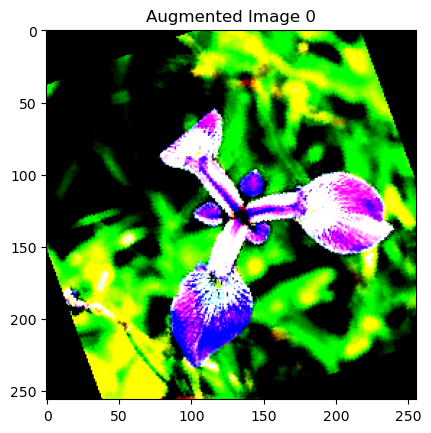

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5005665].


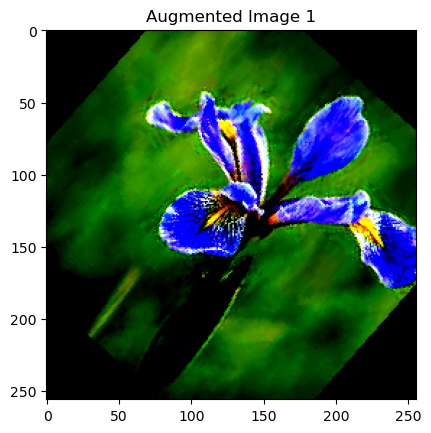

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.2565577].


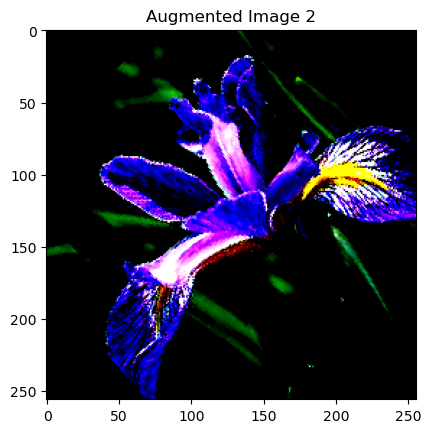

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.3088455].


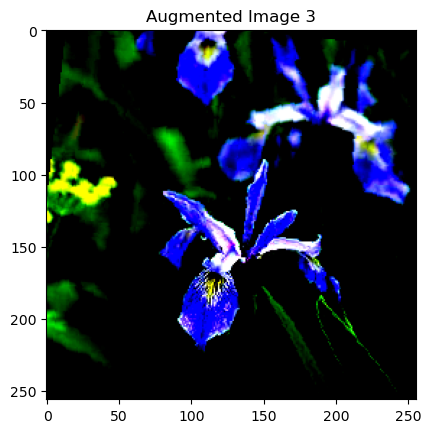

In [34]:
# Iterate through the dataloader and access augmented images
for images, labels in dataloader:
    # Process the augmented images and labels here
    print(images.shape)  # Print the shape of the augmented image batch
    # Display some augmented images
    for i in range(min(4, images.shape[0])):  # Display up to 4 images
        image = images[i].permute(1, 2, 0)  # Reshape for display
        plt.imshow(image)
        plt.title(f"Augmented Image {i}")
        plt.show()
    break